In [1]:
import json 
from pandas.io.json import json_normalize  
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.dates as mdates
import pandas as pd

In [2]:
with open('./data/log.json') as f: 
    d = json.load(f) 
    
dfLog = json_normalize( data=d, meta=['author', 'date', 'hour', 'dayWeek', 'type'] ) 

# Date Filter

In [3]:
dfLog['date'] = dfLog['date'].astype(str).str.replace(r"-", '')
dfLog = dfLog.astype({'date': int})

In [4]:
# Filter in Timeb range
rangeStart = '20150101'
rangeEnd = '20161231'
query = " %s < date < %s" % (rangeStart,rangeEnd)
dfRanged = dfLog.query( query)

dfRanged.reset_index(drop=True, inplace=True)

dfRanged = dfRanged.astype({'date': str})

In [5]:
dfRanged.head()

,author,date,hour,dayWeek,type
0,3,20160529,15:21,Fri,f
1,1,20160529,15:14,Fri,r
2,1,20160529,15:11,Fri,b
3,2,20160529,14:32,Fri,r
4,2,20160529,14:31,Fri,r


# Groups

In [6]:
dfGroup = dfRanged

dfGroup.loc[:,"hh"] = dfGroup['hour'].str.split(':',1).str[0].astype(int) # reset index before loc !!

# dfGroup.loc[:,"authorAlias"] = dfGroup['author'].apply(lambda x: Authors.getAuthorAlias(x))
#dfGroupA = dfGroup.drop(['author'], axis = 1) 

In [7]:
dfGroup1 = dfGroup.groupby(['date','author','dayWeek', 'hh']).count()
dfGroup1.head()

hour  type
date     author dayWeek hh            
20150716 8      Tue     17     1     1
20150717 8      Wed     12     1     1
                        19     1     1
                        23     1     1
20150718 8      Thu     0      2     2

In [8]:
dfGroup2 = dfGroup1.reset_index().drop(['hour'], axis=1)
dfGroup3 = dfGroup2.rename(columns={'type': 'commits'})
dfGroup3.sort_values(by=['author','dayWeek','hh'], inplace=True)
dfGroup3.reset_index(drop=True, inplace=True)

dfGroup3

,date,author,dayWeek,hh,commits
0,20160508,1,Fri,9,1
1,20160529,1,Fri,11,2
2,20160424,1,Fri,13,1
3,20160529,1,Fri,13,1
4,20160417,1,Fri,14,1
...,...,...,...,...,...
1747,20150821,8,Wed,15,1
1748,20150724,8,Wed,16,4
1749,20150821,8,Wed,18,1
1750,20150717,8,Wed,19,1


# Plot 1

In [9]:
weekDays = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun' ]

In [16]:
dfPlot = dfGroup3
demoDFPlot = dfPlot[ dfPlot.author == '3' ].sort_values(by=['date', 'hh'])
demoDFPlot.head(10)

,date,author,dayWeek,hh,commits
372,20150910,3,Tue,13,1
386,20150910,3,Tue,17,2
407,20150911,3,Wed,11,1
260,20151007,3,Mon,8,1
267,20151007,3,Mon,9,1
281,20151007,3,Mon,12,2
300,20151007,3,Mon,15,3
308,20151007,3,Mon,17,1
358,20151008,3,Tue,9,1
365,20151008,3,Tue,11,4


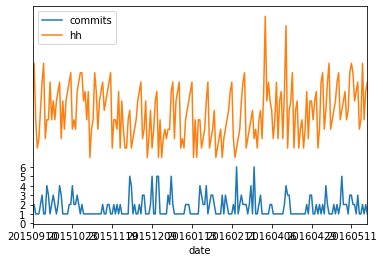

In [36]:
ax =  demoDFPlot.plot(x='date', y=['commits', 'hh'], x_compat=True)
plt.yticks(np.arange(0, demoDFPlot['commits'].max() + 1 , step=1))
#plt.xticks(np.arange( 0, len(demoDFPlot) , step=1))

plt.show()

# Plot 2

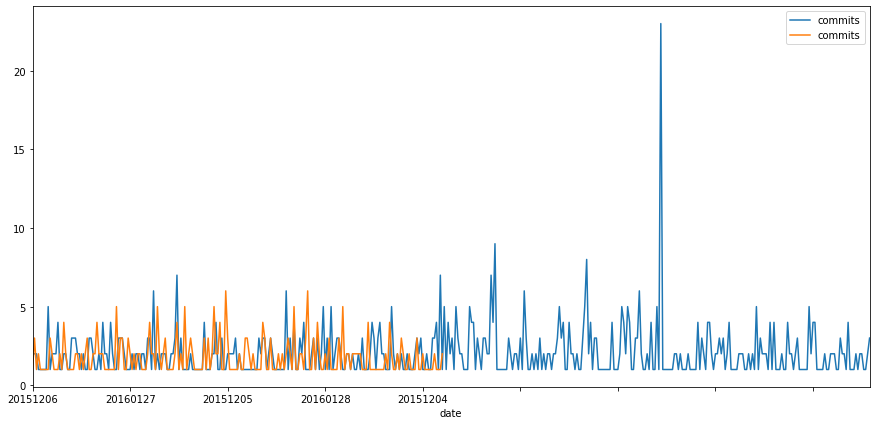

In [35]:
dfPlot2 = dfGroup3

fig, ax = plt.subplots(figsize=(15,7))

dfPlot2.groupby(['date','author']).count()['commits'].unstack()

dfPlot2[ dfPlot2.author == '6' ].plot(ax=ax, x='date', y=['commits'])
dfPlot2[ dfPlot2.author == '3' ].plot(ax=ax, x='date', y=['commits'])


# Plot 3

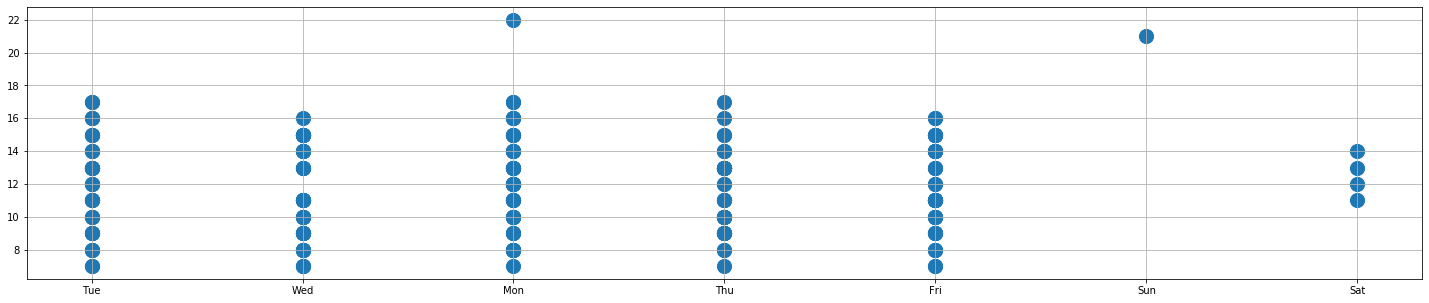

In [37]:

dfPlot3 = dfGroup3

def mapColor( row):
    # print(row[1]['commits'])
    return 'green'
    
figD, axD = plt.subplots()
figD.set_size_inches(25, 5)
_y = demoDFPlot.hh
_x = demoDFPlot.dayWeek
#_color = [ mapColor(row) for row in demoDFPlot.iterrows()  ]
axD.scatter( x=_x, y=_y, s=200, cmap='viridis' ) 
axD.grid()

# Plot 4

In [41]:
dfGroup3

,date,author,dayWeek,hh,commits
0,20160508,1,Fri,9,1
1,20160529,1,Fri,11,2
2,20160424,1,Fri,13,1
3,20160529,1,Fri,13,1
4,20160417,1,Fri,14,1
...,...,...,...,...,...
1747,20150821,8,Wed,15,1
1748,20150724,8,Wed,16,4
1749,20150821,8,Wed,18,1
1750,20150717,8,Wed,19,1


Text(0, 0.5, 'Hour')

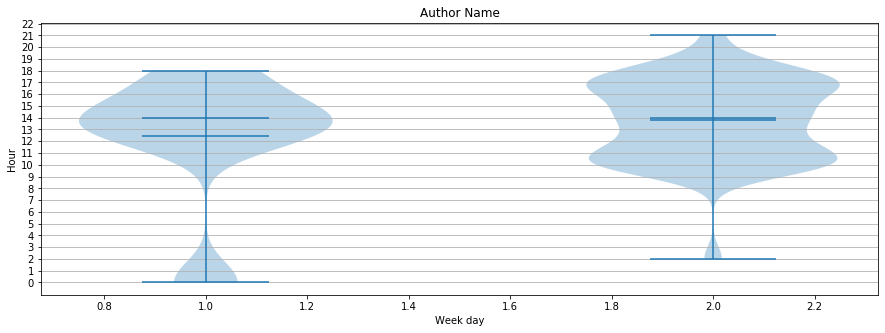

In [44]:
dfPlot4 = dfGroup3

fig, axes = plt.subplots(figsize=(15, 5))

authorName = '2'

axes.violinplot(
    dataset = [
        dfPlot4[(dfPlot['author'] == authorName) & (dfPlot['dayWeek'] == 'Mon')  ]["hh"].values,
        dfPlot4[(dfPlot['author'] == authorName) & (dfPlot['dayWeek'] == 'Tue')  ]["hh"].values
    ],
    showmeans=True, 
    showmedians=True,
    showextrema=True,
    vert=True,
    bw_method=0.3
)

axes.set_title('Author Name')
plt.yticks(np.arange(0,23, 1.0))
#axes.set_xticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fri']) #warning 
axes.yaxis.grid(True)
axes.set_xlabel('Week day')
axes.set_ylabel('Hour')

# Plot 5

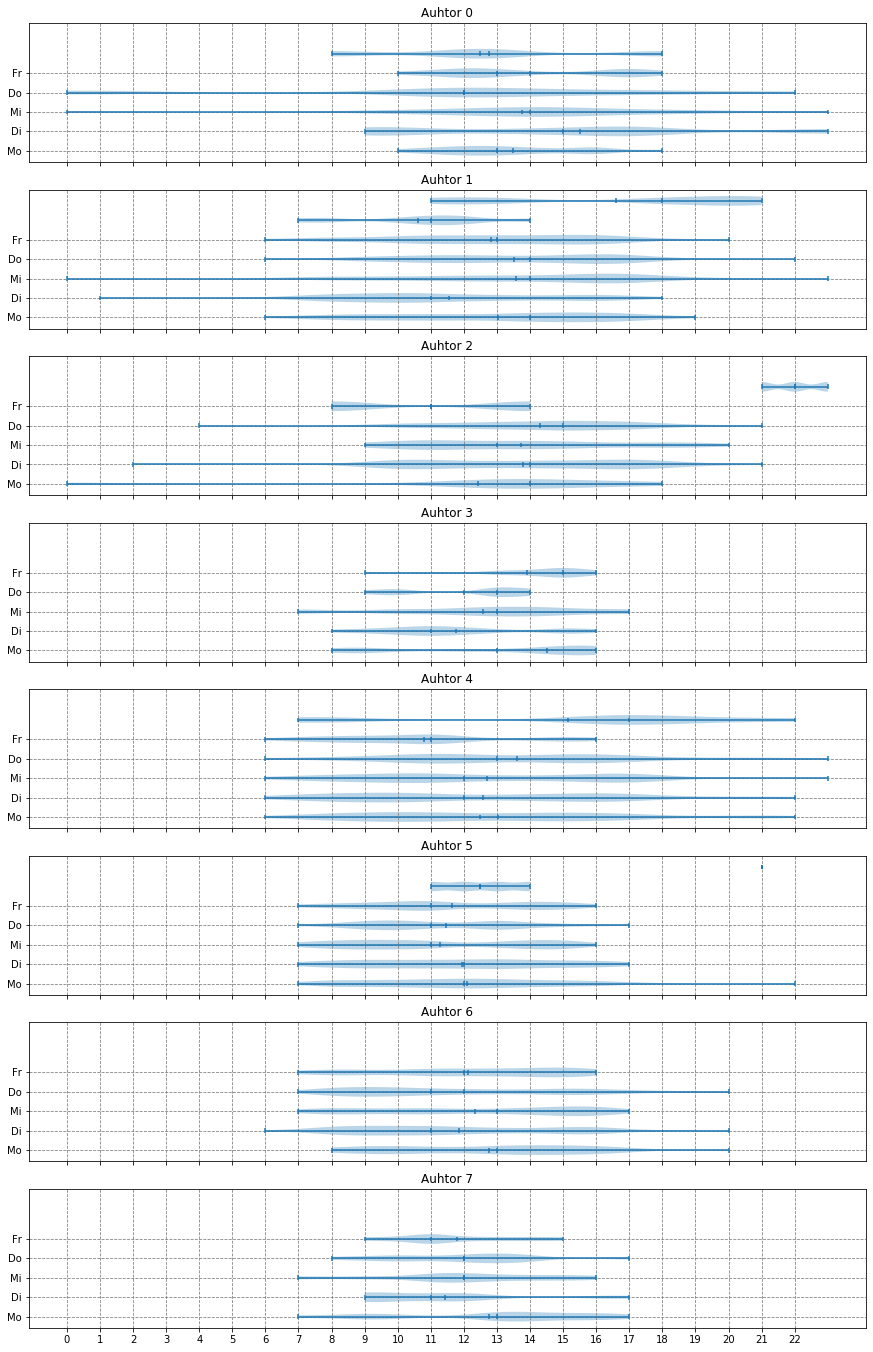

In [51]:

dfPlot5 = dfGroup3

authors = list(set(dfPlot5['author'].tolist())) # or ['Author-1',  ] ## << config

numRows = len(authors) ## << config
numCols = 1
forceOnePlot = False ## << config


fig, ax = plt.subplots(numRows, numCols, sharex='col', sharey='col', figsize=(15, 24)) # or fig, (ax1,...)

def addPlot(axIdx, _authorName):
    authorName = _authorName
    
    datasetResult = []
    
    targetAx = ax if forceOnePlot else ax[axIdx]
    
    for idw, dw in enumerate(weekDays):
        values = dfPlot5[(dfPlot5['author'] == authorName) & (dfPlot5['dayWeek'] == dw)  ]["hh"].values
        if len(values) > 0:
            datasetResult.append(values)
    
    targetAx.violinplot(
        dataset = datasetResult,
        showmeans=True, 
        showmedians=True,
        showextrema=True,
        vert=False, ## << config
        bw_method=0.3
    )
    targetAx.grid(b=True, which='major', color='grey', linestyle='--')
    targetAx.set_title( 'Auhtor ' + str(axIdx) )



for idx, author in enumerate(authors):
    addPlot(idx, author)

plt.setp(
    ax, 
    xticks=np.arange(0,23, 1.0), 
    yticks=[1,2,3,4,5], #,6,7
    yticklabels=['Mo', 'Di', 'Mi', 'Do', 'Fr', 'Sa', 'So'] #reverse order for horizontal plot
) 

plt.show()

# Plot 6

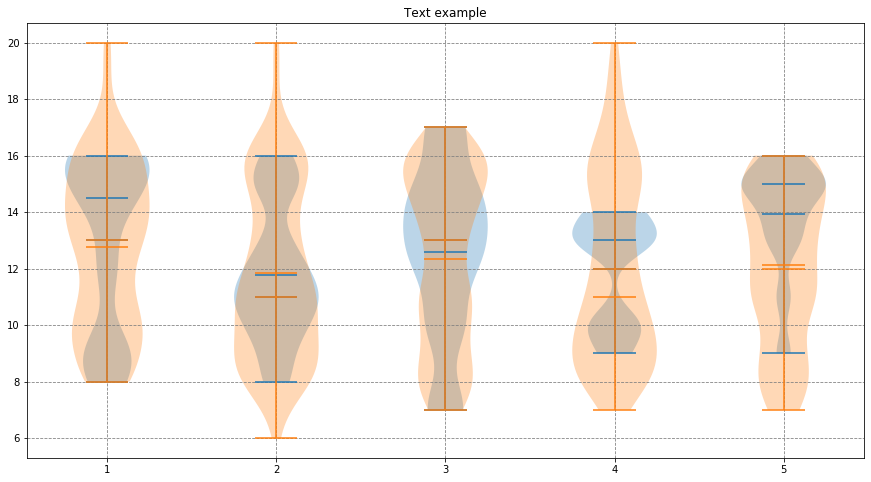

In [53]:
dfPlot6 = dfGroup3

authorsNames = list(set(dfPlot6['author'].tolist()))

authors = ['1','6'] ## << Config

forceOnePlot = True ## << Config
numRows = 1 ## << Config
numCols = 1 ## << Config

fig, ax = plt.subplots(numRows, numCols, sharex='col', sharey='col', figsize=(15, 8))  ## << Config

def addPlot(axIdx, _authorName):
    authorName = _authorName
    
    datasetResult = []
    
    targetAx = ax if forceOnePlot else ax[axIdx]
    
    for idw, dw in enumerate(weekDays):
        values = dfPlot6[(dfPlot6['author'] == authorName) & (dfPlot6['dayWeek'] == dw)  ]["hh"].values
        if len(values) > 0:
            datasetResult.append(values)
    
    targetAx.violinplot(
        dataset = datasetResult,
        showmeans=True, 
        showmedians=True,
        showextrema=True,
        vert=True, ##config
        bw_method=0.3
    )
    targetAx.grid(b=True, which='major', color='grey', linestyle='--')
    targetAx.set_title( 'Text example')



for idx, author in enumerate(authors):
    addPlot(idx, author)


plt.show()

# fig.savefig('./dir1/reportFullPath.png')

# Ressources

- https://stackoverflow.com/questions/53734425/split-date-and-hour-into-another-column-panda
- https://scentellegher.github.io/programming/2017/07/15/pandas-groupby-multiple-columns-plot.html
- https://stackoverflow.com/questions/36499967/how-do-i-remove-omit-the-count-column-from-the-dataframe-in-pandas
- https://stackoverflow.com/questions/10998621/rotate-axis-text-in-python-matplotlib
- https://stackoverflow.com/questions/993358/creating-a-range-of-dates-in-python
- https://stackoverflow.com/questions/17921010/how-to-query-multiindex-index-columns-values-in-pandas
- https://matplotlib.org/3.1.1/tutorials/colors/colormaps.html
- https://stackoverflow.com/questions/42128467/matplotlib-plot-multiple-columns-of-pandas-data-frame-on-the-bar-chart/42131286
